In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import data

NFK international airport data (wind/precipitation)

In [2]:
#import wind/precipitation data
infile_NFK_airport='C:/Users/a_mac/Box Sync/current projects/MTM through the year/0_NFK_weather_review/NCDC_NOAA_precipitation_wind_2000_2018_NFK_IntAirp.csv'
NFK_airport=pd.read_csv(infile_NFK_airport)
#NFK_airport.head()

Virginia Estuarine and Coastal Observing System (VECOS) data (i.e. NO3)

In [3]:
#import VECOS (i.e. nutrients) data
infile_VECOS_Laf_head='C:/Users/a_mac/Box Sync/current projects/MTM through the year/0_NFK_weather_review/VECOS Lafayette/VECOS head lafayette_Granby_ long term monitoring station 1998 to 2018.csv'
VECOS_Laf_head=pd.read_csv(infile_VECOS_Laf_head)
#VECOS_Laf_head

In [9]:
VECOS_filter=VECOS_Laf_head[(VECOS_Laf_head.year>1999)&(VECOS_Laf_head.depth<1.5)]

Water level data from the NOAA station at Sewelles Point

In [4]:
#import Water-Level (i.e. MLLW) data
infile_MLLW_Sewells='C:/Users/a_mac/Box Sync/current projects/MTM through the year/0_NFK_weather_review/MLLW_sewellspoint_2000_20018.csv'
MLLW_Sewells=pd.read_csv(infile_MLLW_Sewells)
#MLLW_Sewells

In [5]:
# Extract/calculate the highest water level per day


# Hourly values are good to observe trends among nutrient and water level datasets. However, nutrient concentrations are only available per day. Therefore, we need to calculate a single water level value to be compared with nutrient concentrations.

# Given the project question/hypothesis, we will extract the highest water level per day to be compared with a response in nutrient concentrations in the Lafayette River.

In [6]:
OutputFileName_MLLWmax="maxMLLWperday.csv"
OutputFile_MLLWmax=open(OutputFileName_MLLWmax,"w")
OutputFile_MLLWmax.write("date,month,day,year,mean_ft,max_ft\n")

for i in MLLW_Sewells.Date.unique():
    maximMLLW=np.max(MLLW_Sewells.Verified_ft[MLLW_Sewells.Date==i])
    Date=i
    month=np.mean(MLLW_Sewells.month[MLLW_Sewells.Date==i])
    day=np.mean(MLLW_Sewells.day[MLLW_Sewells.Date==i])
    year=np.mean(MLLW_Sewells.year[MLLW_Sewells.Date==i])
    avgMLLW=np.mean(MLLW_Sewells.Verified_ft[MLLW_Sewells.Date==i])
    Ouputstring_MLLWmax= "%s,%i,%i,%i,%f,%f" % (Date,month,day,year,avgMLLW,maximMLLW)
    OutputFile_MLLWmax.write(Ouputstring_MLLWmax + "\n")

In [7]:
MLLW_Sewells_max=pd.read_csv(OutputFileName_MLLWmax)
MLLW_Sewells_max

,date,month,day,year,mean_ft,max_ft
0,1/1/2000,1,1,2000,0.965417,2.31
1,1/2/2000,1,2,2000,1.019583,2.41
2,1/3/2000,1,3,2000,0.669167,2.07
3,1/4/2000,1,4,2000,0.462500,1.80
4,1/5/2000,1,5,2000,0.891250,2.75
5,1/6/2000,1,6,2000,0.637917,2.04
6,1/7/2000,1,7,2000,0.900417,2.34
7,1/8/2000,1,8,2000,0.921250,2.31
8,1/9/2000,1,9,2000,0.712083,2.14
9,1/10/2000,1,10,2000,1.038333,2.53


# Combine the datasets (nutrients, wind/precipitation, and water level) for matching dates

VECOS (nutrient) data has data every other day and not daily like the wind/precipitation and water level datasets.

Build a code to match the days in which all data is available.

In [12]:
OutputFileName = "matchingdays.csv"
OutputFile = open(OutputFileName,"w")
OutputFile.write("month,day,year,windspeed,wind_direction,rain,nitra,maxMLLW\n")
# OutputFile.write("month,day,year,windspeed,wind_direction,rain,nitra\n")
# OutputFile.write("month,day,year,windspeed,wind_direction,rain\n")
# OutputFile.write("variableID\n")
# OutputFile.write("nitra,maxMLLW\n")


for i in VECOS_filter.date[(VECOS_filter.Parameter == "NO23F")].unique():
    date=NFK_airport.DATE[NFK_airport.DATE==i]
    month=NFK_airport.month[NFK_airport.DATE==i]
    day=NFK_airport.day[NFK_airport.DATE==i]
    year=NFK_airport.year[NFK_airport.DATE==i]
    wind=NFK_airport.AWND[NFK_airport.DATE==i]
    directionwind=NFK_airport.WDF2[NFK_airport.DATE==i]
    rain=NFK_airport.PRCP[NFK_airport.DATE==i]
    nitra=np.max(VECOS_filter.value[(VECOS_filter.Parameter == "NO23F")&(VECOS_filter.date==i)])
    maxMLLW=np.max(MLLW_Sewells_max.max_ft[(MLLW_Sewells_max.date==i)])
#     MLLW=np.max(MLLW_Sewells.Verified_ft[(MLLW_Sewells.Date==i)])

#     print(maxMLLW)

#     Outputstring = "%i,%i,%i,%f,%f,%f,%f" % (month,day,year,wind,directionwind,rain,nitra)
    Outputstring = "%i,%i,%i,%f,%f,%f,%f,%f" % (month,day,year,wind,directionwind,rain,nitra,maxMLLW)
#     Outputstring = "%f,%f" % (nitra,maxMLLW)
    OutputFile.write(Outputstring + "\n")

In [13]:
infile = "matchingdays.csv"
match_data=pd.read_csv(infile)
match_data

,month,day,year,windspeed,wind_direction,rain,nitra,maxMLLW
0,1,31,2000,8.95,270.0,0.00,0.035,2.16
1,2,24,2000,9.40,240.0,0.00,0.006,2.11
2,3,23,2000,10.07,30.0,0.00,0.042,4.25
3,5,25,2000,7.83,250.0,0.10,0.004,2.79
4,6,22,2000,12.30,310.0,0.02,0.004,2.12
5,7,20,2000,7.38,250.0,0.21,0.004,2.98
6,8,23,2000,7.38,220.0,0.00,0.008,2.56
7,9,21,2000,8.95,250.0,0.00,0.048,2.44
8,10,26,2000,8.50,60.0,0.00,0.005,3.04
9,11,27,2000,7.83,250.0,0.00,0.017,2.71


In [14]:
print(np.shape(match_data.rain))
print(np.shape(match_data.nitra))

(204,)
(204,)


Text(0, 0.5, 'NO3 (uM)')

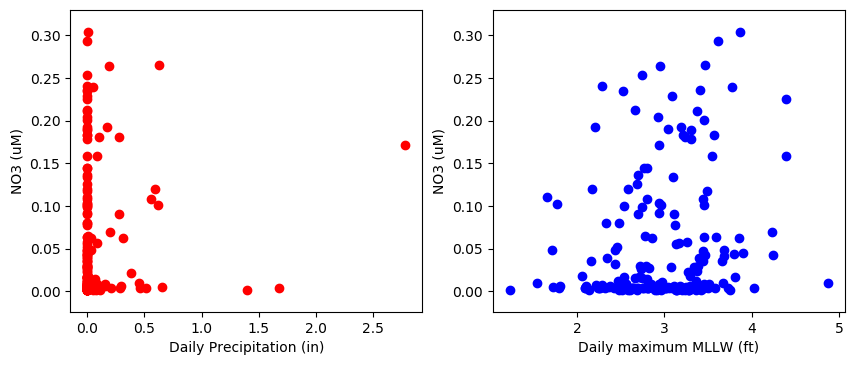

In [15]:
fig, (ax, ax2) =  plt.subplots(1, 2, figsize = (10, 4), dpi = 100)

ax.scatter(match_data.rain,match_data.nitra,color='red')
ax.set_xlabel('Daily Precipitation (in)')
ax.set_ylabel('NO3 (uM)')

ax2.scatter(match_data.maxMLLW,match_data.nitra,color='blue')
ax2.set_xlabel('Daily maximum MLLW (ft)')
ax2.set_ylabel('NO3 (uM)')

Text(0, 0.5, 'NO3(uM)')

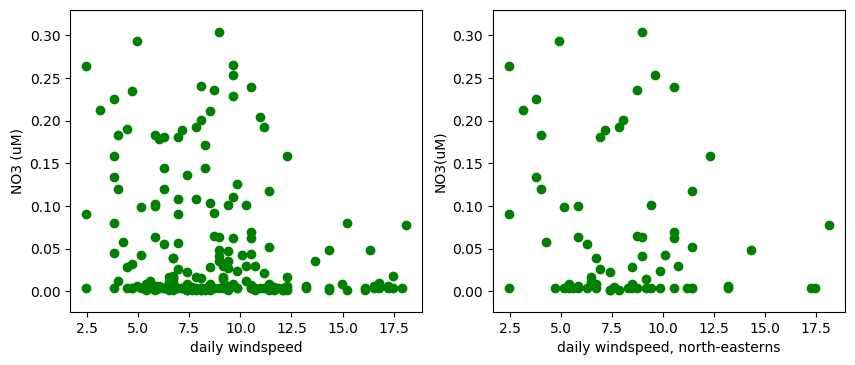

In [16]:
fig, (ax, ax2) = plt.subplots(1,2,figsize = (10,4), dpi=100)

ax.scatter(match_data.windspeed,match_data.nitra,color='green')
ax.set_xlabel('daily windspeed')
ax.set_ylabel('NO3 (uM)')

ax2.scatter(match_data.windspeed[(match_data.wind_direction>0)&(match_data.wind_direction<91)],match_data.nitra[(match_data.wind_direction>0)&(match_data.wind_direction<91)],color='green')
ax2.set_xlabel('daily windspeed, north-easterns')
ax2.set_ylabel('NO3(uM)')

# Use matched-data to build a KNN model

there is now a dataset that has data for all the dessired variables in a given day.

Use this dataset to build a KNN model that predicts nitrate concentrations using, precipitation, windspeed, and water level.



In [38]:
match_data_filter=match_data[(match_data.year<2018)]
# match_data_filter

In [39]:
match_data_filter.columns

Index(['month', 'day', 'year', 'windspeed', 'wind_direction', 'rain', 'nitra',
       'maxMLLW'],
      dtype='object')

In [42]:
# define the sets of data to be used in the model
X=match_data_filter[["windspeed","rain","maxMLLW"]]
y=match_data_filter[["nitra"]]

In [43]:
#print the shape of the sets of data to corroborate that they will be useful while building the model
print(np.shape(X))
print(np.shape(y))

(197, 3)
(197, 1)


# Training and Testing data

In [44]:
# Split the data into training/testing sets
# 1) import the fuction
from sklearn.model_selection import train_test_split

In [45]:
# 2) use the fuction 'train_test_split' to define the train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [46]:
print(np.shape(X_train))
print(np.shape(y_train))

(157, 3)
(157, 1)


# Test the accuracy of models with different values of 'k'

In [47]:
# pick model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
    
results = []
for n in range(1,20,1):
    res = []
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    print ('Neighbors = %s\n' % (int(n)))
    # compute the R^2 score
    accuracyscore = model.score(X_train,y_train)
    print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
    xfit = X_test
    yfit = model.predict(xfit)
    print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
    rmse = sqrt(mean_squared_error(y_test, yfit))
    print("RMSE = %s \n" % (rmse))
    res = [n,accuracyscore,rmse]
    results.append(res)

Neighbors = 1

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 0.07933646702494383 

Neighbors = 2

Training R^2 score: 0.51

Testing R^2 score: 1.00

RMSE = 0.07463004589305838 

Neighbors = 3

Training R^2 score: 0.32

Testing R^2 score: 1.00

RMSE = 0.07511733414391707 

Neighbors = 4

Training R^2 score: 0.24

Testing R^2 score: 1.00

RMSE = 0.07989781559905126 

Neighbors = 5

Training R^2 score: 0.18

Testing R^2 score: 1.00

RMSE = 0.07333919825032177 

Neighbors = 6

Training R^2 score: 0.19

Testing R^2 score: 1.00

RMSE = 0.06940398543631658 

Neighbors = 7

Training R^2 score: 0.21

Testing R^2 score: 1.00

RMSE = 0.0734560433601106 

Neighbors = 8

Training R^2 score: 0.14

Testing R^2 score: 1.00

RMSE = 0.07128022385276298 

Neighbors = 9

Training R^2 score: 0.12

Testing R^2 score: 1.00

RMSE = 0.07145707508880358 

Neighbors = 10

Training R^2 score: 0.11

Testing R^2 score: 1.00

RMSE = 0.07226711734945569 

Neighbors = 11

Training R^2 score: 0.10

Testing 

In [48]:
myarray = np.asarray(results)

#make a dataframe with each column named for ploting
KNN_test_data = pd.DataFrame({'Kneighbors': myarray[:,0], 'AccScore': myarray[:,1], 'RMSE': myarray[:,2]})
KNN_test_data

,Kneighbors,AccScore,RMSE
0,1.0,1.000000,0.079336
1,2.0,0.510867,0.074630
2,3.0,0.316917,0.075117
3,4.0,0.238563,0.079898
4,5.0,0.178935,0.073339
5,6.0,0.194101,0.069404
6,7.0,0.208629,0.073456
7,8.0,0.137662,0.071280
8,9.0,0.118352,0.071457
9,10.0,0.109012,0.072267


Text(0.5, 1.0, 'model performance depending on k-number')

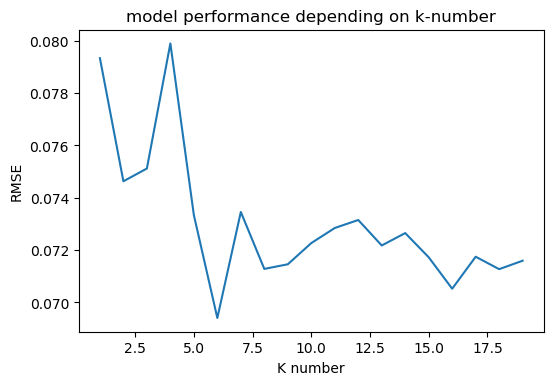

In [49]:
fig, (ax) =  plt.subplots(1, 1, dpi = 100)
plt.plot(myarray[:,0],myarray[:,2])
plt.xlabel('K number')
plt.ylabel('RMSE')
ax.set_title('model performance depending on k-number')

# Build a model based on the above analysis (effect of k number)

Choose a number for k: 7
Training R^2 score: 0.21
Testing R^2 score: 1.00


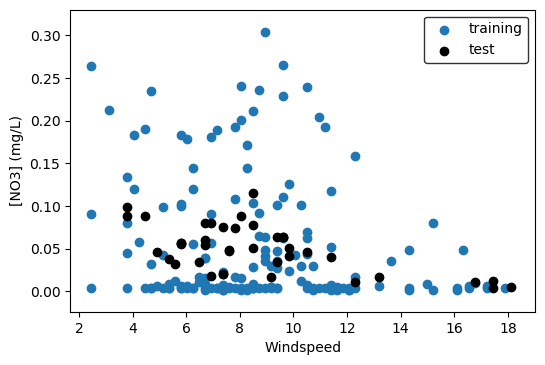

In [52]:
# use the script below to build the model based on KNN. 
# you will have to choose a number for 'k'.

n  = int(input('Choose a number for k: '))

# pick model
model = KNeighborsRegressor(n_neighbors=n)
model.fit(X_train, y_train)

# compute the R^2 score
print("Training R^2 score: {0:.2f}".format(model.score(X_train,y_train)))

# plot the model together with the data
xfit = X_test
yfit = model.predict(xfit)
print("Testing R^2 score: {0:.2f}".format(model.score(xfit,yfit)))

#plt.scatter(X_train[["sal"]],y_train)
fig, (ax) =  plt.subplots(1, 1, dpi = 100)
plt.scatter(X_train[["windspeed"]],y_train)
plt.scatter(xfit[["windspeed"]], yfit,c = 'k')
plt.xlabel('Windspeed')
plt.ylabel('[NO3] (mg/L)')
ax.legend(('training', 'test'), edgecolor = 'k', loc = 'upper right')

In [ ]:
# define the sets of data to be used in the model
X=match_data_filter[["windspeed","rain","maxMLLW"]]
y=match_data_filter[["nitra"]]

Training R^2 score: 0.21
Testing R^2 score: 1.00


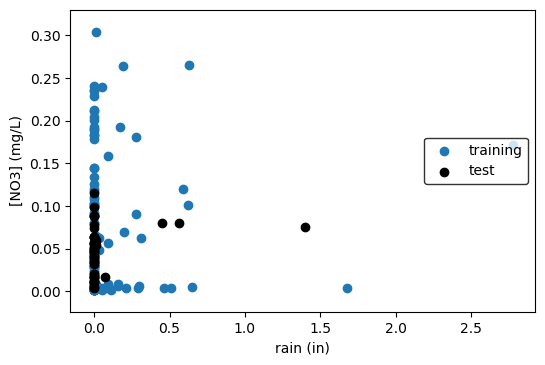

In [55]:
# plot the nitrate predictions vs the other test variable (i.e. salinity)
# and plot the train data to compare with the model

fig, (ax) =  plt.subplots(1, 1, dpi = 100)
plt.scatter(X_train[["rain"]],y_train)
plt.scatter(xfit[["rain"]], yfit,c = 'k')
plt.xlabel('rain (in)')
plt.ylabel('[NO3] (mg/L)')
ax.legend(('training', 'test'), edgecolor = 'k', loc = 'center right')

print("Training R^2 score: {0:.2f}".format(model.score(X_train,y_train)))
print("Testing R^2 score: {0:.2f}".format(model.score(xfit,yfit)))

In [ ]:
# define the sets of data to be used in the model
X=match_data_filter[["windspeed","rain","maxMLLW"]]
y=match_data_filter[["nitra"]]

Training R^2 score: 0.21
Testing R^2 score: 1.00


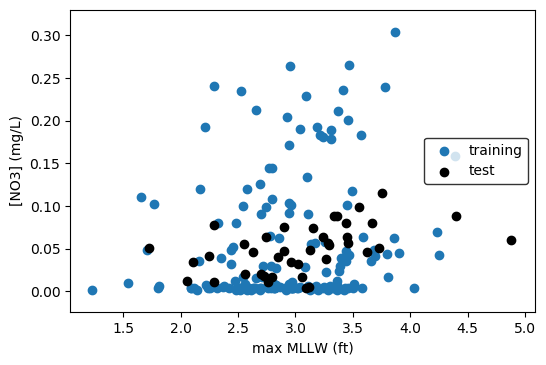

In [56]:
# plot the nitrate predictions vs the other test variable (i.e. salinity)
# and plot the train data to compare with the model

fig, (ax) =  plt.subplots(1, 1, dpi = 100)
plt.scatter(X_train[["maxMLLW"]],y_train)
plt.scatter(xfit[["maxMLLW"]], yfit,c = 'k')
plt.xlabel('max MLLW (ft)')
plt.ylabel('[NO3] (mg/L)')
ax.legend(('training', 'test'), edgecolor = 'k', loc = 'center right')

print("Training R^2 score: {0:.2f}".format(model.score(X_train,y_train)))
print("Testing R^2 score: {0:.2f}".format(model.score(xfit,yfit)))

# Build a model using filtered-predicting variables

The results of the model using the whole sets of data are bad (R^2=0.21, tes vs training data).

Filter the predicting variables (i.e. maxMLLW>3ft) and build a new model